In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train_data.drop("id",axis=1,inplace=True)

In [5]:
train_data.drop("Surname",axis=1,inplace=True)

In [6]:
train_data.set_index("CustomerId", inplace=True)

In [7]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
df_corr=train_data.corr()

<AxesSubplot:>

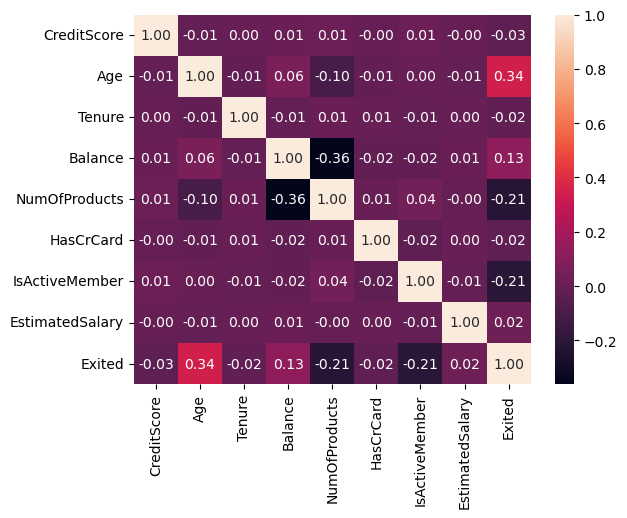

In [9]:
sns.heatmap(df_corr,annot=True,fmt=".2f")

<Figure size 1000x600 with 0 Axes>

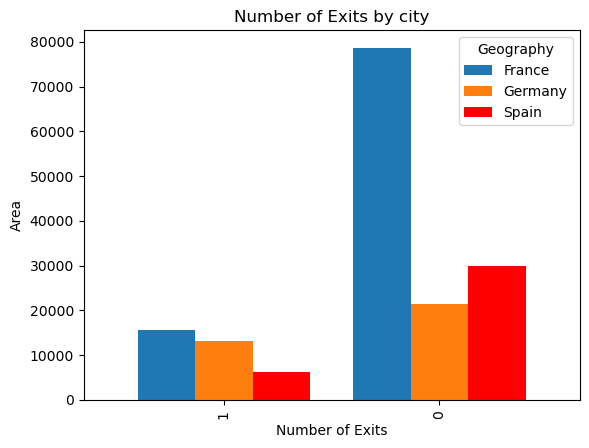

In [10]:
area_exit_counts = train_data.groupby(["Exited",'Geography']).size().unstack(fill_value=0)
area_exit_counts = area_exit_counts.sort_values(by='Exited', ascending=False)
plt.figure(figsize=(10, 6))
area_exit_counts.plot(kind='bar', width=0.8, color=['#1f77b4', '#ff7f0e',"red"])
plt.title('Number of Exits by city')
plt.xlabel('Number of Exits')
plt.ylabel('Area')

plt.show()


In [11]:
train_data['Gender'] = train_data['Gender'].map({"Male":1,"Female":0})

<Figure size 800x600 with 0 Axes>

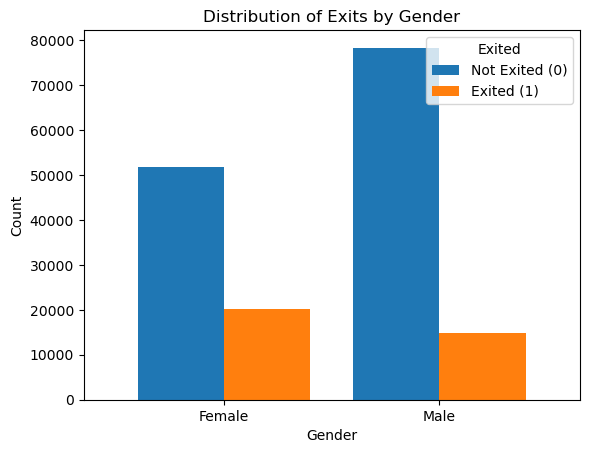

In [12]:
gender_exit_counts = train_data.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 6))
gender_exit_counts.plot(kind='bar', width=0.8, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Exits by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'], loc='upper right')

plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)

plt.show()


In [13]:
X_train=train_data[["Gender","CreditScore","Gender","Age","Balance","IsActiveMember"]]

In [14]:
y_train = train_data['Exited']

In [15]:
from sklearn.model_selection import train_test_split
X_train_split, X_test, y_train_split, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier=RandomForestClassifier(random_state=42)
classifier.fit(X_train_split, y_train_split)
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy on Testing Set: {accuracy:.2f}')


Random Forest Accuracy on Testing Set: 0.81
